# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [108]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):
    
    
    data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    
    data['Date'] = pd.to_datetime(data['Date'])
    
    # remove leap day
    no_leap = data['Date'].dt.day != 29
    data = data[no_leap]
    
    # get data for 2015
    data2015 = data[data['Date'].dt.year == 2015]
    data2015.sort_values(by='Date', inplace=True)
    data2015['days'] = data2015['Date'].dt.dayofyear
    
    # get data for 2005 to 2014
    target_period = (data['Date'].dt.year >= 2005) & (data['Date'].dt.year <= 2014)
    data2005_2014 = data[target_period]
    data2005_2014.sort_values(by='Date', inplace=True)
    data2005_2014['days'] = data2005_2014['Date'].dt.dayofyear


    # get the highest and lowest data for each day.
    record_high = data2005_2014.groupby(['days'])['Data_Value'].max()
    record_high.sort_index(inplace=True)

    record_low = data2005_2014.groupby(['days'])['Data_Value'].min()
    record_low.sort_index(inplace=True)

    high2015  = data2015.groupby(['days'])['Data_Value'].max()
    high2015.sort_index(inplace=True)

    low2015 = data2015.groupby(['days'])['Data_Value'].min()
    low2015.sort_index(inplace=True)
    
    # font size adjustment.
    SMALL_SIZE = 8
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 24
    
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    # create figure to draw line graph
    plt.figure(figsize=(30,20))
    
    # draw line graph using data between 2005 and 2014
    plt.plot(record_high.index, record_high, '-', color='orange')
    plt.plot(record_low.index, record_low, '-', color='cyan')
    
    # shade area between high and low lines.
    plt.gca().fill_between(record_high.index, record_high.values, record_low.values, facecolor='grey', alpha=0.15)
    
    # remove junk ink from graph.
    # remove unnecessary paramaters.
    plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')    
    
    # remove unnecessary spines.
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    # get broken high records.
    x = [x for x in high2015.index if high2015.loc[x] > record_high.loc[x]]
    y = [high2015.loc[y] for y in x ]
    
    # get broken low records.
    x2 = [x for x in low2015.index if low2015.loc[x] < record_low.loc[x]]
    y2 = [low2015.loc[y] for y in x2]
    
    plt.scatter(x, y, c='red')
    plt.scatter(x2, y2, c='blue')
    
    # creat legend.
    plt.legend(frameon=False, labels=['The highest temp in 2005-2014', 'The lowest temp in 2005-2014', 
                                      'Trend', 'Broken high temp in 2015', 'Broken low temp in 2015'])
    # set labels
    plt.xlabel('Day of the year')
    plt.ylabel('Temperature ')
    
    # set title
    plt.title('Temperature trend in 2005-2014 and borken records in 2015')
    
    plt.grid(axis='y')

    
    
    plt.savefig('Temp_record.png')
    
    # show scatter graph on map.
    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    
    plt.show()
    
    




/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is tryin

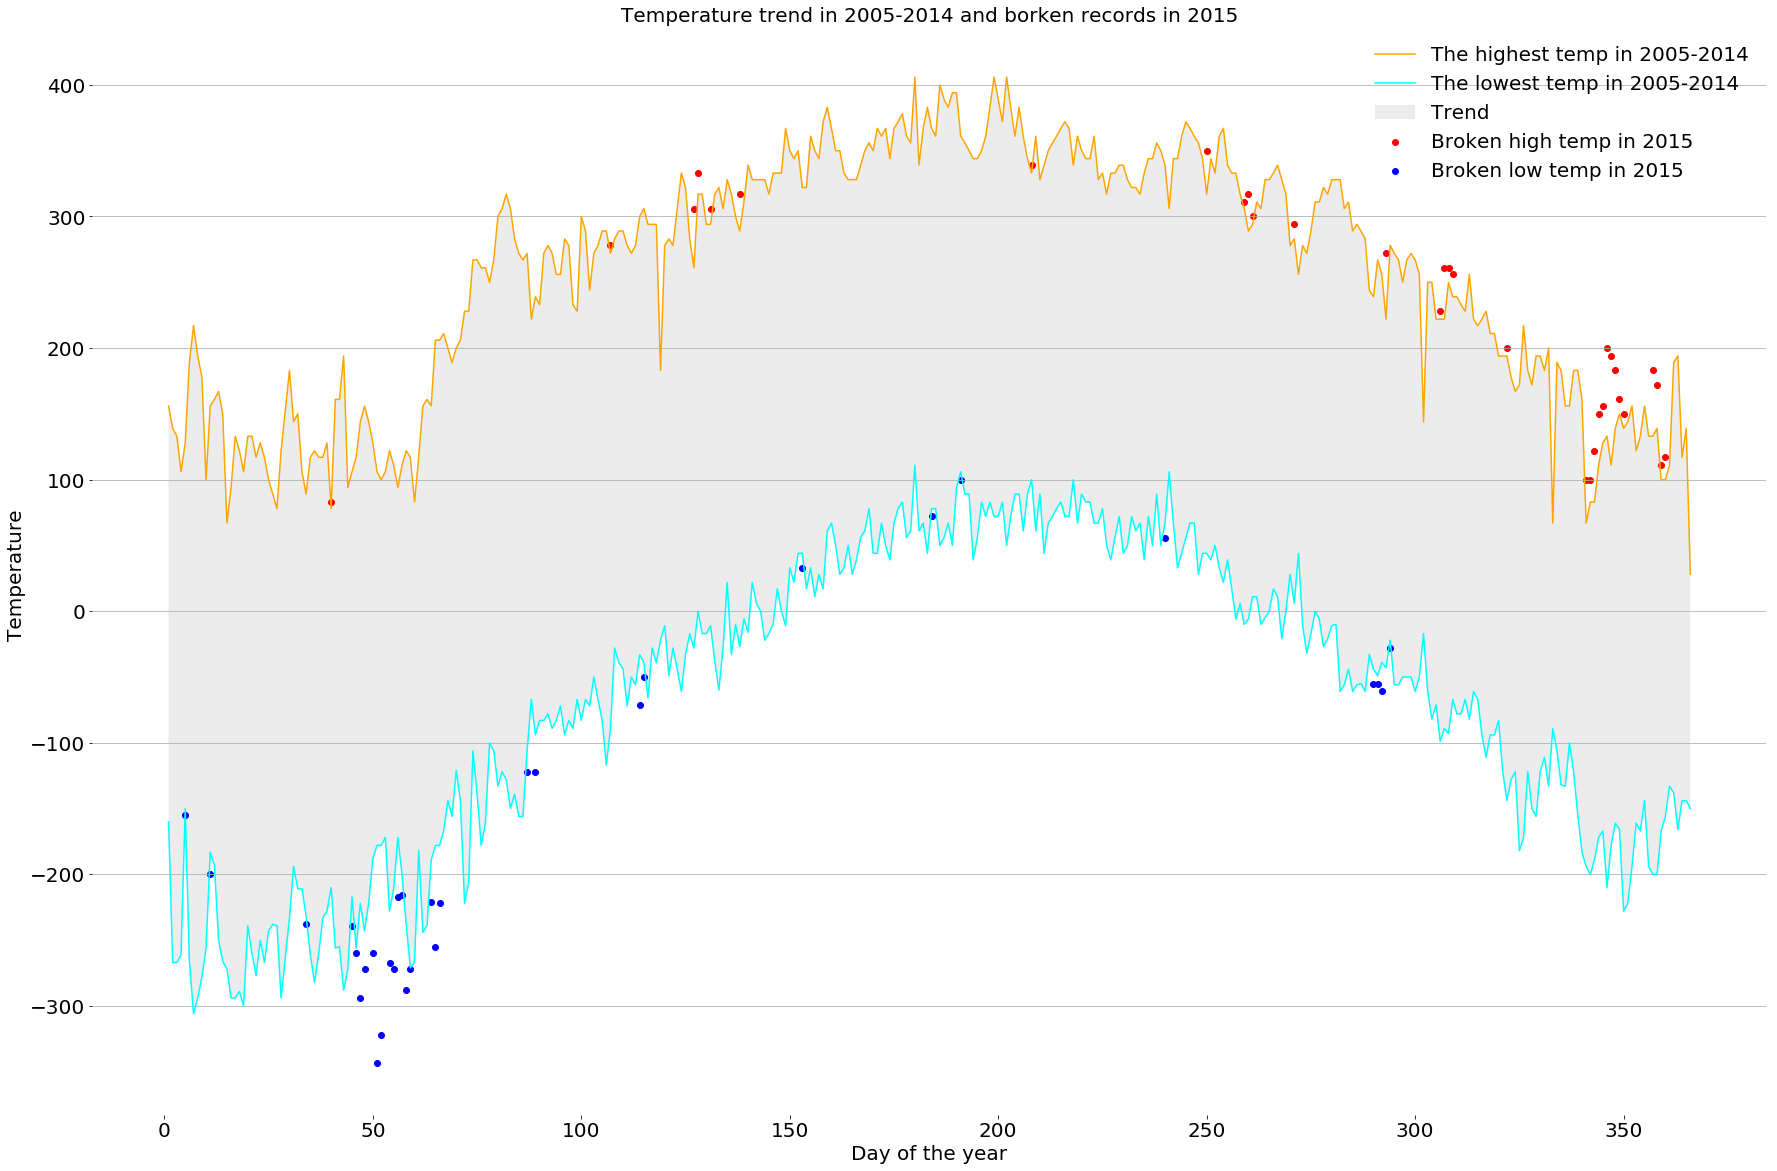

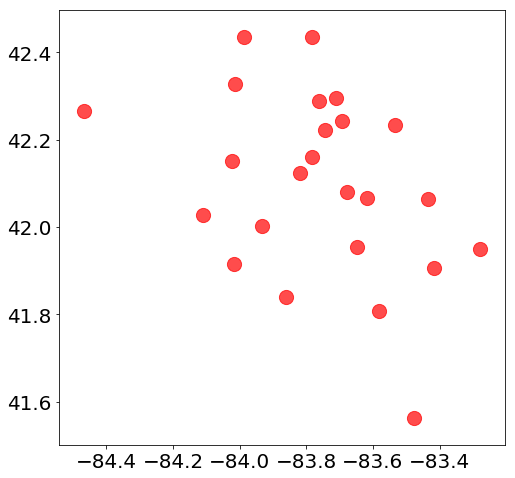

In [109]:
leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')